In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [ ]:
df = pd.read_csv('diabetes.csv', na_values =['?'])
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,17,163.0,72.0,41.0,114.0,40.9,0.817,47,1
1,15,136.0,70.0,32.0,110.0,37.1,0.153,43,1
2,14,175.0,62.0,30.0,NaN,33.6,0.212,38,1
3,14,100.0,78.0,25.0,184.0,36.6,0.412,46,1
4,13,104.0,72.0,NaN,NaN,31.2,0.465,38,1
...,...,...,...,...,...,...,...,...,...
763,0,173.0,78.0,32.0,265.0,46.5,1.159,58,0
764,0,137.0,84.0,27.0,NaN,27.3,0.231,59,0
765,0,105.0,84.0,NaN,NaN,27.9,0.741,62,1
766,0,161.0,50.0,NaN,NaN,21.9,0.254,65,0


In [ ]:
df.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### Data Cleaning

In [ ]:
df.fillna(df.median(),inplace=True)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Spliting train and test data 

In [ ]:
x = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df['Outcome']
X_train,X_test,Y_train,Y_test = train_test_split(df,y,test_size=0.2)

### Before Feature Selection 

In [ ]:
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
accuracy_score(Y_test,knn.predict(X_test))

0.7272727272727273

### Appling Univariate feature selection

In [ ]:
X_best= SelectKBest(chi2, k=5).fit(X_train, Y_train)
mask = X_best.get_support() #list of booleans for selected features
new_feat = []
for bool, feature in zip(mask, X_train.columns):
 if bool:
     new_feat.append(feature)

In [ ]:
new_feat

['Pregnancies', 'Glucose', 'Insulin', 'Age', 'Outcome']

In [ ]:
x_train = X_train[new_feat]
x_test = X_test[new_feat]

In [ ]:
del knn
knn=KNeighborsClassifier()
knn.fit(x_train,Y_train)
accuracy_score(Y_test,knn.predict(x_test))

0.7207792207792207

### Appling Recursive feature elimination

In [ ]:
estimator = RandomForestClassifier()
selector = RFE(estimator, n_features_to_select = 5)
selector = selector.fit(X_train, Y_train)
rfe_mask = selector.get_support() 


In [ ]:
new_feat = [] 
for bool, feature in zip(rfe_mask, X_train.columns):
 if bool:
     new_feat.append(feature)
new_feat 

['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

In [ ]:
del x_train
del x_test
x_train = X_train[new_feat]
x_test = X_test[new_feat]

In [ ]:
del knn
knn=KNeighborsClassifier()
knn.fit(x_train,Y_train)
accuracy_score(Y_test,knn.predict(x_test))

0.7727272727272727

### Appling PCA (Principal Component Analysis)

In [ ]:
pca = PCA(0.95)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
del x_train
del x_test
x_train = pca.transform(X_train)
x_test = pca.transform(X_test)

In [ ]:
del knn
knn=KNeighborsClassifier()
knn.fit(x_train,Y_train)
accuracy_score(Y_test,knn.predict(x_test))

0.7077922077922078

### Using Correlation


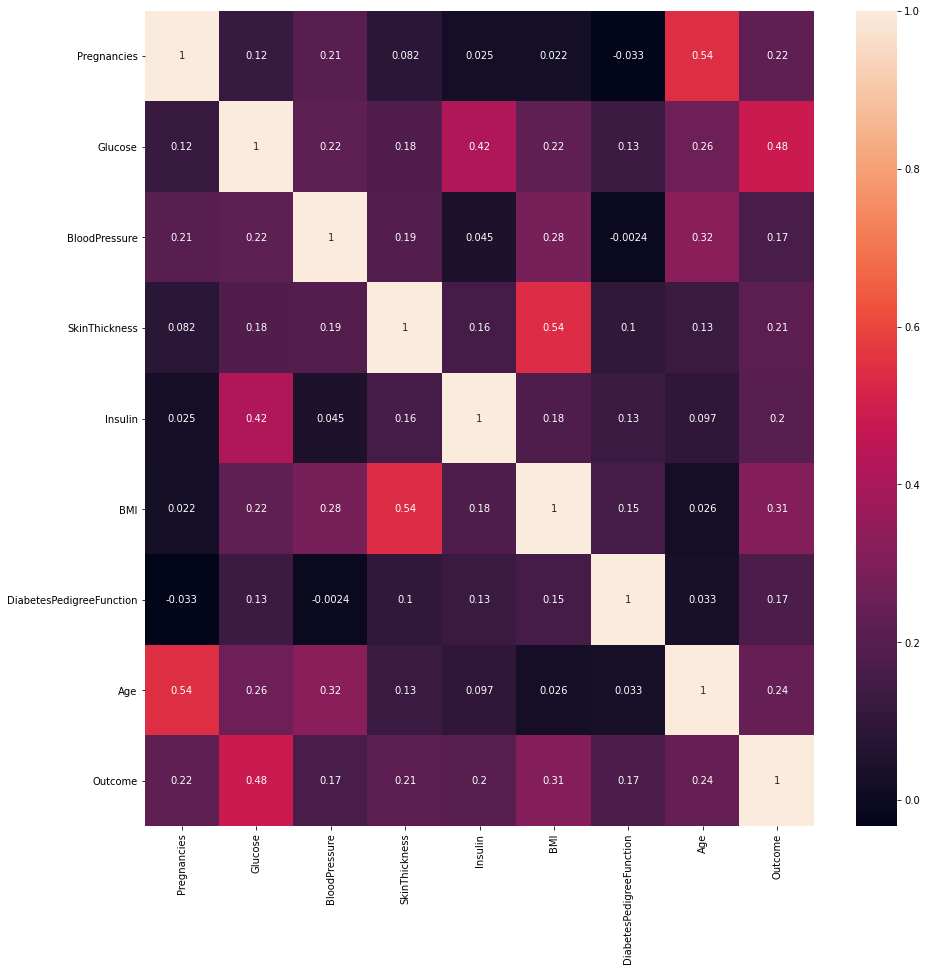

In [ ]:
corr = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

In [ ]:
abs(corr['Outcome']).sort_values(ascending = False)

Outcome                     1.000000
Glucose                     0.480972
BMI                         0.312038
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.214873
Insulin                     0.203790
DiabetesPedigreeFunction    0.173664
BloodPressure               0.165723
Name: Outcome, dtype: float64

#### Selecting top 5 feature

In [ ]:
x_train = X_train[['Glucose', 'BMI', 'Age', 'Pregnancies', 'SkinThickness']]
x_test = X_test[['Glucose', 'BMI', 'Age', 'Pregnancies', 'SkinThickness']]

In [ ]:
del knn
knn=KNeighborsClassifier()
knn.fit(x_train,Y_train)
accuracy_score(Y_test,knn.predict(x_test))

0.7077922077922078